# Name : Khalil Alhamoud

# IOT & Computer Vision Task1 :

# 1.1 Object Detector In Image

# 1.2 Object Detector In Vedio

# 1.3 Character Detector

# 1.1 Object Detector In Image

In [39]:
import cv2
import numpy as np
import datetime
import pytesseract
import matplotlib.pyplot as plt

In [40]:
image = cv2.imread('examples/image1.jpg')
image = cv2.resize(image, (640, 480))
h = image.shape[0]
w = image.shape[1]

In [41]:
# set path to the weights and model files
weights = "ssd_mobilenet/frozen_inference_graph.pb"
model = "ssd_mobilenet/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [42]:
# load the MobileNet SSD model
net = cv2.dnn.readNetFromTensorflow(weights, model)

In [43]:
# load the class labels
class_names = []
with open("ssd_mobilenet/coco_names.txt", "r") as f:
    class_names = f.read().strip().split("\n")

In [44]:
# create a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0/127.5, (320, 320), [127.5, 127.5, 127.5])
# set the blob as input for the network and detect the objects on the image
net.setInput(blob)
output = net.forward()

In [45]:
# loop over the number of detected objects
for detection in output[0, 0, :, :]:
    probability = detection[2]
    if probability < 0.5:
        continue

        
    # perform element-wise multiplication to get the (x, y) coordinates of the bounding box        
    box = [int(a * b) for a, b in zip(detection[3:7], [w, h, w, h])]
    box = tuple(box)
    
    
    # draw the bounding box of the object    
    cv2.rectangle(image, box[:2], box[2:], (0, 255, 0), thickness=2)
    
    # draw the name of the predicted object along with the probability
    class_id = int(detection[1])
    label = f"{class_names[class_id - 1].upper()} {probability * 100:.2f}%"
    cv2.putText(image, label, (box[0], box[1] + 15),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

In [46]:
cv2.imshow('Image', image)
cv2.waitKey()

-1

# 1.2 Object Detector In Vedio

In [47]:
video_cap = cv2.VideoCapture("examples/video1.mp4")

In [48]:
# grab the width and the height of the video stream
frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_cap.get(cv2.CAP_PROP_FPS))

In [49]:
# initialize the FourCC and a video writer object
fourcc = cv2.VideoWriter_fourcc(*"XVID")
writer = cv2.VideoWriter("output.mp4", fourcc, fps, (frame_width, frame_height))

In [50]:
# path to the weights and model files
weights1 = "ssd_mobilenet/frozen_inference_graph.pb"
model1 = "ssd_mobilenet/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
# load the MobileNet SSD model trained  on the COCO dataset
net1 = cv2.dnn.readNetFromTensorflow(weights1, model1)

In [51]:
class_names1 = []
with open("ssd_mobilenet/coco_names.txt", "r") as f:
    class_names1 = f.read().strip().split("\n")

In [52]:
# create a list of random colors to represent each class
np.random.seed(42)
colors1 = np.random.randint(0, 255, size=(len(class_names1), 3))

In [53]:
# loop over the frames
while True:

    start = datetime.datetime.now()
    success, frame = video_cap.read()
    h1 = frame.shape[0]
    w1 = frame.shape[1]

    # create a blob from the frame
    blob = cv2.dnn.blobFromImage(frame, 1.0/127.5, (320, 320), [127.5, 127.5, 127.5])
    
    # pass the blog through our network and get the output predictions
    net1.setInput(blob)
    output1 = net1.forward() # shape: (1, 1, 100, 7)

    # loop over the number of detected objects
    for detection in output1[0, 0, :, :]: 
        probability1 = detection[2]
        if probability1 < 0.5:
            continue

        # extract the ID of the detected object
        class_id1 = int(detection[1])
        label1 = class_names1[class_id1 - 1].upper()
        color1 = colors1[class_id1]
        B, G, R = int(color1[0]), int(color1[1]), int(color1[2])
        # perform element-wise multiplication to get the (x, y) coordinates of the bounding box
        box1 = [int(a * b) for a, b in zip(detection[3:7], [w1, h1, w1, h1])]
        box1 = tuple(box1)
        # draw the bounding box of the object
        cv2.rectangle(frame, box1[:2], box1[2:], (B, G, R), thickness=2)

        # draw the name of the predicted object along with the probability
        text1 = f"{label1} {probability1 * 100:.2f}%"
        cv2.putText(frame, text1, (box1[0], box1[1]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # end time to compute the fps
    end = datetime.datetime.now()
    # calculate the frame per second and draw it on the frame
    fps = f"FPS: {1 / (end - start).total_seconds():.2f}"
    cv2.putText(frame, fps, (50, 50),cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)
    cv2.imshow("Output", frame)
    # write the frame to disk
    writer.write(frame)
    if cv2.waitKey(10) == ord("q"):
        break

# release the video capture, video writer, and close all windows
video_cap.release()
writer.release()
cv2.destroyAllWindows()

# 1.3 Character Detector

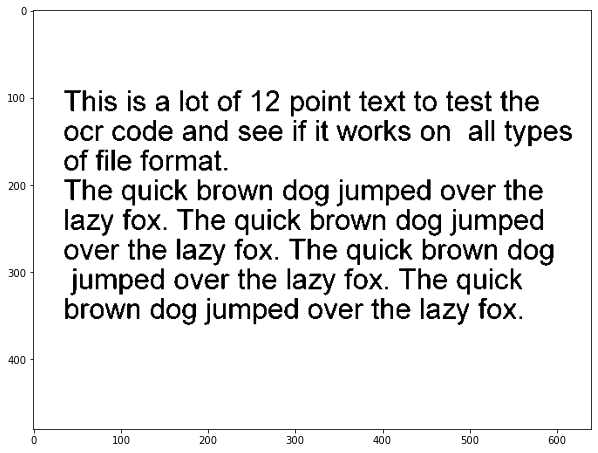

The Text Extrxct From the Image Is : 


 This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [54]:
import pytesseract
import matplotlib.pyplot as plt
# Read the image using OpenCV
image2 = cv2.imread('examples/OCR.jpg')
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Convert the image to grayscale
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Perform OCR using pytesseract
text = pytesseract.image_to_string(gray)

# Show image to extract text from
plt.figure(figsize=(10,10))
plt.imshow(image2, cmap='gray')
plt.show()

# Print the extracted text
print("The Text Extrxct From the Image Is : \n\n\n",text)
